<a href="https://colab.research.google.com/github/MateoIbaniez/ML---Analisis-de-datos/blob/main/Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aclaraciones:

Se puede correr todo de una, pero sin hacer los analisis.
Osea si se desea crear el DF, entonces correr: imports, carga de los datos y drop, acomodar la data, undersampling y separacion entre train y valid, encodeo,

#imports

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import scipy as sc

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import sklearn as sk
import re
import category_encoders as ce
import matplotlib.pyplot as plt

#Carga de los datos y drop

In [ ]:
data = pd.read_parquet('/content/drive/MyDrive/data tp ml/train.parq')

In [ ]:
data

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0
...,...,...,...,...,...,...,...,...,...,...,...
61629680,2023-08-24 21:14:52+00:00,DE,12897.0,ENTEGA Medianet GmbH,DE,3209.0,Vodafone GmbH,http:scan,24879,190784,0
61629681,2023-08-24 21:14:46+00:00,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:scan,40383,193446,0
61629682,2023-08-24 21:14:46+00:00,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:spam,40383,193446,0
61629683,2023-08-24 21:14:46+00:00,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:spam,40383,193446,0


Dado a que el "watcher_as_name" y "watcher_as_num" (lo mismo con attacker), representan ambos al dato AS (Autonomous System), pero uno como string y el otro como numero, procedo a dropear, las columnas "watcher_as_name" y "attacker_as_name". Explicacion de que es AS: Un sistema autónomo (AS) es una red o grupo de redes muy grande con una única política de enrutamiento. A cada AS se le asigna un único ASN, que es un número que identifica al AS. (explicacionn obtenida del sitio de cloudflare).

In [ ]:
data.drop(axis=1, columns=['attacker_as_num', "watcher_as_num"], inplace=True)

In [ ]:
#data.dropna(how = 'any', inplace=True)
columnas = data.columns
dicc = {}

for col in columnas:
  dicc[col] = data[col].isnull().values.any()

dicc


{'attack_time': False,
 'watcher_country': True,
 'watcher_as_name': True,
 'attacker_country': True,
 'attacker_as_name': True,
 'attack_type': False,
 'watcher_uuid_enum': False,
 'attacker_ip_enum': False,
 'label': False}

In [ ]:
data.watcher_country = data.watcher_country.astype('object')
data.attacker_country = data.attacker_country.astype('object')

data.watcher_country.fillna ( 'nan', inplace = True)
data.attacker_country.fillna('nan', inplace = True)

data.watcher_country = data.watcher_country.astype('category')
data.attacker_country = data.attacker_country.astype('category')


In [ ]:
data

,attack_time,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,Host Europe GmbH,TR,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,Host Europe GmbH,TR,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,bn:t Blatzheim Networks Telecom GmbH,DE,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,bn:t Blatzheim Networks Telecom GmbH,DE,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,bn:t Blatzheim Networks Telecom GmbH,DE,Contabo GmbH,http:exploit,2,4637,0
...,...,...,...,...,...,...,...,...,...
61629680,2023-08-24 21:14:52+00:00,DE,ENTEGA Medianet GmbH,DE,Vodafone GmbH,http:scan,24879,190784,0
61629681,2023-08-24 21:14:46+00:00,US,NAMECHEAP-NET,US,WOW,http:scan,40383,193446,0
61629682,2023-08-24 21:14:46+00:00,US,NAMECHEAP-NET,US,WOW,http:spam,40383,193446,0
61629683,2023-08-24 21:14:46+00:00,US,NAMECHEAP-NET,US,WOW,http:spam,40383,193446,0


Vemos si hay filas duplicadas. En caso de que todos los elementos de la fila sean repetidos

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data

,attack_time,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,Host Europe GmbH,TR,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,Host Europe GmbH,TR,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,bn:t Blatzheim Networks Telecom GmbH,DE,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,bn:t Blatzheim Networks Telecom GmbH,DE,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,bn:t Blatzheim Networks Telecom GmbH,DE,Contabo GmbH,http:exploit,2,4637,0
...,...,...,...,...,...,...,...,...,...
61629671,2023-08-24 21:14:59+00:00,US,INMOTION,US,ATT-INTERNET4,http:bruteforce,9606,191439,0
61629673,2023-08-24 21:14:59+00:00,US,INMOTION,US,ATT-INTERNET4,http:scan,9606,191439,0
61629674,2023-08-24 21:14:59+00:00,US,INMOTION,US,ATT-INTERNET4,http:exploit,9606,191439,0
61629681,2023-08-24 21:14:46+00:00,US,NAMECHEAP-NET,US,WOW,http:scan,40383,193446,0


Veo cuantas cosas distintas hay en cada categoria. No me fijo cuantos attackt_time hay xq es obvio que muchos.

In [ ]:
#categorias = {}

#categorias['watcher_country'] = len(list(data.watcher_country.unique()))
# categorias['attacker_country'] = len(list(data.attacker_country.unique()))
# categorias['attack_type'] = len(list(data.attack_type.unique()))
# categorias['attacker_as_num'] = len(list(data.attacker_as_num.unique()))
# categorias['watcher_as_num'] = len(list(data.watcher_as_num.unique()))

# categorias

#Analisis de attack_time





Nos quedamos con las timezones

In [ ]:
data.attack_time.describe()

<ipython-input-38-63f01b1902e3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.attack_time.describe()


count                       1791620
unique                       772904
top       2023-08-24 01:24:26+00:00
freq                             33
first     2023-07-30 00:00:23+00:00
last      2023-08-29 12:56:09+00:00
Name: attack_time, dtype: object

In [ ]:
def chequear_time_zone(x):
  a= str(x)
  return a[19:]

time_zones = data.attack_time.map(chequear_time_zone)

podemos ver como la time zone a la que se hace referencia es a la del meridiano de Greenwich. Como todas las rows comparten este dato, lo quito, para asi reducir el peso de la feature, ya que es redundate el dato este o no este

In [ ]:
time_zones.unique()

array(['+00:00'], dtype=object)

<p align="justify">
Como podemos ver en el describe unas celdas mas arriba, la primer y ultima fecha comparten año y ademas todas las fechas transcurren en 2 meses, finales del 7 (julio) y casi todo el 8 (agosto). Por lo que quitaremos el año y el mes. attack_time en sus valores pasara a tener el siguiente formato: ddhhmmss. d=dia; h=hora; m=minuto; s=segundo. En total seran 31 dias, contando desde el 30 del 7, hasta el 29 del 8.







In [ ]:
pasar_dias = {
  '730' : '1',
  '731' : '2'
}
formato = 798
for i in range(3, 32):
  pasar_dias[str(formato+i)] = str(i)

pasar_dias

{'730': '1',
 '731': '2',
 '801': '3',
 '802': '4',
 '803': '5',
 '804': '6',
 '805': '7',
 '806': '8',
 '807': '9',
 '808': '10',
 '809': '11',
 '810': '12',
 '811': '13',
 '812': '14',
 '813': '15',
 '814': '16',
 '815': '17',
 '816': '18',
 '817': '19',
 '818': '20',
 '819': '21',
 '820': '22',
 '821': '23',
 '822': '24',
 '823': '25',
 '824': '26',
 '825': '27',
 '826': '28',
 '827': '29',
 '828': '30',
 '829': '31'}

In [ ]:
time = data.attack_time
time1 = time[:20000000]
time2 = time[20000000:]

In [ ]:
def recortar_y_formatear_time(x):
  fecha = str(x)
  mes_dia = fecha[6:10]
  horas_min_seg = fecha[11:19]
  mes_dia = re.sub("[-]","", mes_dia)
  dia = pasar_dias[mes_dia]
  horas_min_seg = re.sub("[:]","", horas_min_seg)

  return int(dia + horas_min_seg)


In [ ]:
time11 = time1.map(recortar_y_formatear_time)

In [ ]:
time22 = time2.map(recortar_y_formatear_time)

In [ ]:
timefinal = pd.concat([time11, time22])
data.attack_time = timefinal

<ipython-input-46-8998325ad91f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.attack_time = timefinal


In [ ]:
data.attack_time = data.attack_time.astype('int32')

<ipython-input-47-69799921ebad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.attack_time = data.attack_time.astype('int32')


In [ ]:
data.attack_time.info()

<class 'pandas.core.series.Series'>
Int64Index: 1791620 entries, 83 to 61629523
Series name: attack_time
Non-Null Count    Dtype
--------------    -----
1791620 non-null  int32
dtypes: int32(1)
memory usage: 20.5 MB


In [ ]:
data

,attack_time,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
83,2071902,US,LIQUIDWEB,RU,Biterika Group LLC,http:spam,32,7314,1
84,2071902,US,LIQUIDWEB,RU,Biterika Group LLC,http:scan,32,7314,1
1255,2141951,NL,Hostinger International Limited,CA,AMAZON-02,http:spam,49,5506,0
1256,2141951,NL,Hostinger International Limited,CA,AMAZON-02,http:scan,49,5506,0
1522,3070559,US,NETWORK-SOLUTIONS-HOSTING,US,PONYNET,http:spam,70,7402,1
...,...,...,...,...,...,...,...,...,...
61629375,26210944,US,LIQUIDWEB,US,QUINTEX,http:spam,25685,198558,1
61629389,26210944,DK,One.com A/S,SG,DIGITALOCEAN-ASN,http:scan,24258,193313,1
61629390,26210944,DK,One.com A/S,SG,DIGITALOCEAN-ASN,http:spam,24258,193313,1
61629522,26211148,ES,DinaHosting S.L.,US,UNIFIEDLAYER-AS-1,http:spam,43724,196833,0


#Analizamos la feature watcher_country






vemos que en total tiene 130 paises

In [ ]:
data.watcher_country.value_counts().head(15)

US    13903719
DE     6220133
FR     3551877
GB     2199410
NL     2116872
PL     1579018
CA     1001141
SG      978675
AU      912528
RU      660443
JP      599910
FI      491292
CZ      488811
IT      461477
DK      441570
Name: watcher_country, dtype: int64

vemos como se distribuye la cantidad de ataques realizados a los paises de los watcher's

In [ ]:
watcher_country_contados = data.watcher_country.value_counts()

valores = [ 5,6,7,8,9,10, 20, 30, 50, 55]

for valor in valores:
  print("El " + str( round( (watcher_country_contados / len(data)).head(valor).sum(), 4) ) + " de los ataques, se alcanza con los: " + str(valor) + " primeros paises" )

El 0.6996 de los ataques, se alcanza con los: 5 primeros paises
El 0.739 de los ataques, se alcanza con los: 6 primeros paises
El 0.764 de los ataques, se alcanza con los: 7 primeros paises
El 0.7885 de los ataques, se alcanza con los: 8 primeros paises
El 0.8113 de los ataques, se alcanza con los: 9 primeros paises
El 0.8278 de los ataques, se alcanza con los: 10 primeros paises
El 0.9312 de los ataques, se alcanza con los: 20 primeros paises
El 0.971 de los ataques, se alcanza con los: 30 primeros paises
El 0.9932 de los ataques, se alcanza con los: 50 primeros paises
El 0.9955 de los ataques, se alcanza con los: 55 primeros paises


In [ ]:

valores = [100, 1000, 10000, 100000, 1000000]

for valor in valores:
  print("la cantidad de paises con mas de " + str(valor) + " ataques, son: " + str(watcher_country_contados.loc[watcher_country_contados > valor].count() ) )

la cantidad de paises con mas de 100 ataques, son: 109
la cantidad de paises con mas de 1000 ataques, son: 90
la cantidad de paises con mas de 10000 ataques, son: 58
la cantidad de paises con mas de 100000 ataques, son: 28
la cantidad de paises con mas de 1000000 ataques, son: 7


#Analizamos la feature attacker_country


son 214 paises, los lugares de donde provienen los distintos ataques

In [ ]:
data.attacker_country.value_counts().head(15)

US    10960767
DE     3356995
SG     2454730
CN     2440407
NL     2123788
FR     2022647
IN     1572664
GB     1330397
RU     1216720
CA      927635
VN      900540
BR      590707
ID      587289
HK      551878
AU      469061
Name: attacker_country, dtype: int64

Vemos como se concentra la cantidad de ataques segun el pais

In [ ]:
attacker_country_contados = data.attacker_country.value_counts()

valores = [ 5, 6, 10, 15, 20, 30, 50, 55, 60, 70, 100]

for valor in valores:
  print("El " + str( round( (attacker_country_contados / len(data)).head(valor).sum(), 4) ) + " de los ataques, se alcanza con los: " + str(valor) + " primeros paises" )

El 0.0 de los ataques, se alcanza con los: 0 primeros paises
El 0.5332 de los ataques, se alcanza con los: 5 primeros paises
El 0.5838 de los ataques, se alcanza con los: 6 primeros paises
El 0.7099 de los ataques, se alcanza con los: 10 primeros paises
El 0.7874 de los ataques, se alcanza con los: 15 primeros paises
El 0.8393 de los ataques, se alcanza con los: 20 primeros paises
El 0.9018 de los ataques, se alcanza con los: 30 primeros paises
El 0.9565 de los ataques, se alcanza con los: 50 primeros paises
El 0.9638 de los ataques, se alcanza con los: 55 primeros paises
El 0.9698 de los ataques, se alcanza con los: 60 primeros paises
El 0.9793 de los ataques, se alcanza con los: 70 primeros paises
El 0.9938 de los ataques, se alcanza con los: 100 primeros paises


In [ ]:

valores = [100, 1000, 10000, 100000, 1000000]

for valor in valores:
  print("la cantidad de paises con mas de " + str(valor) + " ataques, son: " + str(attacker_country_contados.loc[attacker_country_contados > valor].count() ) )

la cantidad de paises con mas de 100 ataques, son: 188
la cantidad de paises con mas de 1000 ataques, son: 152
la cantidad de paises con mas de 10000 ataques, son: 104
la cantidad de paises con mas de 100000 ataques, son: 42
la cantidad de paises con mas de 1000000 ataques, son: 9


#Attack_type analisis:

Hay 15 tipos de ataques distintos

In [ ]:
data.attack_type.value_counts()

http:spam          613352
http:scan          411592
http:exploit       378650
http:bruteforce    183002
ssh:bruteforce     152064
otro                52960
Name: attack_type, dtype: int64

In [ ]:
len(data.attack_type.value_counts().unique())

6

In [ ]:
attack_type_contados = data.attack_type.value_counts()

valores = [ 3, 5, 7, 10, 12]

for valor in valores:
  print("El " + str( round( (attack_type_contados / len(data)).head(valor).sum(), 4) ) + " de los tipos de ataques, se alcanza con los: " + str(valor) + " primeros tipos" )

El 0.7834 de los tipos de ataques, se alcanza con los: 3 primeros tipos
El 0.9704 de los tipos de ataques, se alcanza con los: 5 primeros tipos
El 1.0 de los tipos de ataques, se alcanza con los: 7 primeros tipos
El 1.0 de los tipos de ataques, se alcanza con los: 10 primeros tipos
El 1.0 de los tipos de ataques, se alcanza con los: 12 primeros tipos


In [ ]:
tipos_freq = data.attack_type.value_counts().reset_index()
tipos_freq.columns = ['tipo', 'cantidad']
primeros_5 = list(tipos_freq.tipo.unique()[:5])
primeros_5

['http:spam', 'http:scan', 'http:exploit', 'http:bruteforce', 'ssh:bruteforce']

In [ ]:
cinco_attack_types = data[['attack_type', 'label']]

def agrupar_attack_types(x):
  tipo = str(x)
  if tipo in primeros_5:
    return tipo
  else:
    return 'otro'

cinco_attack_types.attack_type = cinco_attack_types['attack_type'].map(agrupar_attack_types)


<ipython-input-60-9ace4406ed12>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cinco_attack_types.attack_type = cinco_attack_types['attack_type'].map(agrupar_attack_types)


In [ ]:
cinco_attack_types.attack_type.unique()

array(['http:spam', 'http:scan', 'http:exploit', 'http:bruteforce',
       'otro', 'ssh:bruteforce'], dtype=object)

In [ ]:
cinco_attack_types

,attack_type,label
83,http:spam,1
84,http:scan,1
1255,http:spam,0
1256,http:scan,0
1522,http:spam,1
...,...,...
61629375,http:spam,1
61629389,http:scan,1
61629390,http:spam,1
61629522,http:spam,0


In [ ]:
df_aux = cinco_attack_types.loc[cinco_attack_types['attack_type'] == 'otro']
df_aux

,attack_type,label
45520,otro,1
97960,otro,1
126517,otro,1
155522,otro,1
189952,otro,0
...,...,...
61629118,otro,1
61629139,otro,1
61629208,otro,1
61629232,otro,0


Podemos ver como se distribuye la label en la categoria 'otros' y como es lo esperado mucho 0 poco 1.

In [ ]:
df_aux.label.value_counts()

0    33342
1    19618
Name: label, dtype: int64

In [ ]:
data.attack_type = cinco_attack_types.attack_type

<ipython-input-65-4af577212256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.attack_type = cinco_attack_types.attack_type


In [ ]:
data.attack_type.unique()

array(['http:spam', 'http:scan', 'http:exploit', 'http:bruteforce',
       'otro', 'ssh:bruteforce'], dtype=object)

#Analizamos la feature watcher_as_name

vemos como hay 2770 AS (anonimous system) distintos, por parte del watcher


In [ ]:
data.watcher_as_name.value_counts()

OVH SAS                       2687610
Hetzner Online GmbH           2330869
DIGITALOCEAN-ASN              1964375
GOOGLE-CLOUD-PLATFORM         1678486
IONOS SE                      1410578
                               ...   
Virtual1 Limited                    1
Nine Internet Solutions AG          1
Nomotech SAS                        1
OEC-FIBER                           1
UAB Airnet                          1
Name: watcher_as_name, Length: 2770, dtype: int64

In [ ]:
nombres_as = data[['watcher_as_name', 'label']]

In [ ]:
repeticiones_as_name = data.watcher_as_name.value_counts()

Podemos observar que proporcion de los watcher_as_num, segun la cantidad de ataques recibidos, tienen cierta label.

In [ ]:
valores = [1, 10, 100, 1000, 10000, 100000, 1000000, 100000000]
for valor in valores:
  freq = repeticiones_as_name.loc[ repeticiones_as_name <= valor]
  freq = freq.reset_index()
  freq.columns = ["watcher_as_name", "frecuencia"]
  freq = nombres_as.merge(freq)
  freq.drop('frecuencia',axis=1, inplace=True)
  data =  freq.label.value_counts().values
  if len(data) > 1:
    print("Los AS de los watcher, con frecuencia <= " + str(valor) + " , son: " + str(data[0]/ len(freq.watcher_as_name) ) + " con label 0 y, " + str(data[1]/len(freq.watcher_as_name)) + " con label 1")
  else:
    print("Los AS de los watcher, con frecuencia <= " + str(valor) + " , son: " + str(data[0]/len(freq.watcher_as_name))+ " (" +str(data[0])+")" + " con label 0")

Los AS de los watcher, con frecuencia <= 1 , son: 1.0 (71) con label 0
Los AS de los watcher, con frecuencia <= 10 , son: 0.9894884372810091 con label 0 y, 0.01051156271899089 con label 1
Los AS de los watcher, con frecuencia <= 100 , son: 0.9851015220259356 con label 0 y, 0.014898477974064421 con label 1
Los AS de los watcher, con frecuencia <= 1000 , son: 0.9810387045000926 con label 0 y, 0.018961295499907407 con label 1
Los AS de los watcher, con frecuencia <= 10000 , son: 0.9812388957321468 con label 0 y, 0.01876110426785313 con label 1
Los AS de los watcher, con frecuencia <= 100000 , son: 0.9824072488466973 con label 0 y, 0.017592751153302763 con label 1
Los AS de los watcher, con frecuencia <= 1000000 , son: 0.982605362656536 con label 0 y, 0.017394637343464008 con label 1
Los AS de los watcher, con frecuencia <= 100000000 , son: 0.9820902291656545 con label 0 y, 0.01790977083434548 con label 1


In [ ]:
watcher_as_name_contados = data['watcher_as_name'].value_counts()

valores = [ 10, 20, 30, 100, 200, 250, 270, 300, 500, 700, 900]

for valor in valores:
  print("El " + str( round( (watcher_as_name_contados / len(data)).head(valor).sum(), 4) ) + " de los watchers AS, se alcanza con los: " + str(valor) + " primeros AS names" )

El 0.3646 de los watchers AS, se alcanza con los: 10 primeros AS names
El 0.505 de los watchers AS, se alcanza con los: 20 primeros AS names
El 0.5878 de los watchers AS, se alcanza con los: 30 primeros AS names
El 0.7807 de los watchers AS, se alcanza con los: 100 primeros AS names
El 0.8655 de los watchers AS, se alcanza con los: 200 primeros AS names
El 0.889 de los watchers AS, se alcanza con los: 250 primeros AS names
El 0.8968 de los watchers AS, se alcanza con los: 270 primeros AS names
El 0.9072 de los watchers AS, se alcanza con los: 300 primeros AS names
El 0.9507 de los watchers AS, se alcanza con los: 500 primeros AS names
El 0.9733 de los watchers AS, se alcanza con los: 700 primeros AS names
El 0.9859 de los watchers AS, se alcanza con los: 900 primeros AS names


#Analizamos la feature attacker_as_name

<p align="justify">
Podemos observar como la cantidad de AS distintos, por attacker es de 8023. Numero mayor al los AS de los watcher, por ende los AS de donde provienen los ataques estan menos concentrados. Los ataques provienen de mas anonimous systems que donde van a parar (otros anonimous systems).

In [ ]:
data.attacker_as_name.value_counts()

DIGITALOCEAN-ASN               2969787
MICROSOFT-CORP-MSN-AS-BLOCK    2462926
OVH SAS                        2272223
GOOGLE-CLOUD-PLATFORM          1149698
Hetzner Online GmbH            1089414
                                ...   
76 TELECOMUNICACAO LTDA              0
Nexon Asia Pacific Pty Ltd           0
TOTALCHOICE                          0
KP Intertelecom Ltd                  0
UAB ESNET                            0
Name: attacker_as_name, Length: 8023, dtype: int64

In [ ]:
numeros_as = data[['attacker_as_name', 'label']]

In [ ]:
repeticiones_as_name = data.attacker_as_name.value_counts()

In [ ]:
valores = [1, 10, 100, 1000, 10000, 100000, 1000000, 100000000]
for valor in valores:
  freq = repeticiones_as_name.loc[ repeticiones_as_name <= valor]
  freq = freq.reset_index()
  freq.columns = ["attacker_as_name", "frecuencia"]
  freq = numeros_as.merge(freq)
  freq.drop('frecuencia',axis=1, inplace=True)
  data =  freq.label.value_counts().values
  if len(data) > 1:
    print("Los AS de los attackers, con frecuencia <= " + str(valor) + " , son: " + str(data[0]/ len(freq.attacker_as_name) ) + " con label 0 y, " + str(data[1]/len(freq.attacker_as_name)) + " con label 1")
  else:
    print("Los AS de los attackers, con frecuencia <= " + str(valor) + " , son: " + str(data[0]/len(freq.attacker_as_name)) + " (" +str(data[0])+")" + " con label 0")

In [ ]:
attacker_as_name_contados = data['attacker_as_name'].value_counts()

valores = [ 10, 20, 30, 100, 200, 250, 270, 300, 500, 700, 900]

for valor in valores:
  print("El " + str( round( (attacker_as_name_contados / len(data)).head(valor).sum(), 4) ) + " de los attackers AS, se alcanza con los: " + str(valor) + " primeros AS names" )

El 0.3615 de los attackers AS, se alcanza con los: 10 primeros AS names
El 0.4723 de los attackers AS, se alcanza con los: 20 primeros AS names
El 0.5347 de los attackers AS, se alcanza con los: 30 primeros AS names
El 0.7209 de los attackers AS, se alcanza con los: 100 primeros AS names
El 0.8134 de los attackers AS, se alcanza con los: 200 primeros AS names
El 0.8389 de los attackers AS, se alcanza con los: 250 primeros AS names
El 0.8473 de los attackers AS, se alcanza con los: 270 primeros AS names
El 0.8581 de los attackers AS, se alcanza con los: 300 primeros AS names
El 0.9061 de los attackers AS, se alcanza con los: 500 primeros AS names
El 0.9329 de los attackers AS, se alcanza con los: 700 primeros AS names
El 0.9496 de los attackers AS, se alcanza con los: 900 primeros AS names


#watcher_uuid_enum analisis

al tirar los duplicados podemos ver como, hay distintas ip de los atacantes, que atacan a distintos watchers. Por ende como el watcher varia bastante, no dropeo esa columna si no que la conservo

In [ ]:
a = data[['attacker_ip_enum', 'watcher_uuid_enum']]
a.drop_duplicates(inplace = True)
a.attacker_ip_enum.value_counts()

<ipython-input-32-ca6e8ab7f67c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.drop_duplicates(inplace = True)


151386    23070
43850     19819
168614    17256
198035    16860
173855    15511
          ...  
23625         1
26575         1
24094         1
55568         1
199690        1
Name: attacker_ip_enum, Length: 148259, dtype: int64

#Attacker_ip_enum

In [ ]:
df_segun_ip = data

quito los duplicados pues si estan duplicados es porque ya hay un ataque, con esa ip que se hizo desde ese pais

In [ ]:
ip_pais_atacante = df_segun_ip[['attacker_ip_enum', 'attacker_country', 'label']].drop_duplicates()

In [ ]:
ip_pais_atacante

,attacker_ip_enum,attacker_country
0,6466,TR
2,4637,DE
10,8817,GH
11,6251,VN
13,5510,US
...,...,...
61481746,198862,US
61484942,194893,IN
61568580,192953,US
61568584,190292,SG


Aparece algo raro, hay una ip con mas de un pais de origen. Son 192 distintas (sin repeticiones) ip's las que tienen mas de un pais asociado.


In [ ]:
ip_pais_contados = ip_pais_atacante.attacker_ip_enum.value_counts()
ip_pais_contados

93566     2
184278    2
191037    2
108286    2
65883     2
         ..
66461     1
61849     1
60263     1
65305     1
199690    1
Name: attacker_ip_enum, Length: 148259, dtype: int64

In [ ]:
ips_mas_de_un_origen = ip_pais_contados.loc[ip_pais_contados == 2].reset_index()
ips_mas_de_un_origen.columns=['attacker_ip_enum', 'cantidad']
ips_mas_de_un_origen.drop('cantidad', axis=1, inplace=True)
ips_mas_de_un_origen

,attacker_ip_enum
0,93566
1,184278
2,191037
3,108286
4,65883
...,...
187,192254
188,169220
189,34511
190,34165


Vemos que en las ip's con mas de un pais se sigue guardando la relacion entre las label's.

In [ ]:
ip_pais_atacante.merge(ips_mas_de_un_origen).label.value_counts()

0    364
1     20
Name: label, dtype: int64

In [ ]:
df_segun_ip.merge(ips_mas_de_un_origen).label.value_counts()

0    493610
1      1312
Name: label, dtype: int64

Vemos la relacion entre los tipos de ataque y la ip del atacante

In [ ]:
ip_attack_type = data[['attacker_ip_enum', 'attack_type', 'label']]

In [ ]:
ip_attack_type.drop_duplicates(inplace = True)

<ipython-input-21-78f24685d30a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip_attack_type.drop_duplicates(inplace = True)


Vemos que como maximo hay 10 ataques distintos registrados, para las ip's y como minimo 1

In [ ]:
ip_attack_type.attacker_ip_enum.value_counts()

165668    10
58012     10
96395     10
58945      9
147871     9
          ..
158076     1
156311     1
59306      1
58704      1
60387      1
Name: attacker_ip_enum, Length: 148259, dtype: int64

#Acomodar la data


Con lo analizado pasamos los tipos de ataque de 15 a 6

*   http:spam
*   http:scan
*   http:exploit
*   ssh:bruteforce
*   http:bruteforce
*   otro

In [ ]:
tipos_freq = data.attack_type.value_counts().reset_index()
tipos_freq.columns = ['tipo', 'cantidad']
tipos_freq

,tipo,cantidad
0,http:spam,12971937
1,http:scan,9378467
2,http:exploit,7191852
3,ssh:bruteforce,4533447
4,http:bruteforce,4220069
5,windows:bruteforce,568301
6,pop3/imap:bruteforce,440027
7,tcp:scan,334790
8,unknown:unknown,323418
9,sip:bruteforce,224943


In [ ]:
primeros_5 = list(tipos_freq.tipo.unique()[:5])
cinco_attack_types = data['attack_type']

def agrupar_attack_types(x):
  tipo = str(x)
  if tipo in primeros_5:
    return tipo
  else:
    return 'otro_tipo'

cinco_attack_types = cinco_attack_types.map(agrupar_attack_types)

In [ ]:
data.attack_type =  cinco_attack_types

In [ ]:
data.attack_type = data.attack_type.astype('category')

In [ ]:
data.attack_type.unique()

['http:exploit', 'http:spam', 'http:bruteforce', 'http:scan', 'otro_tipo', 'ssh:bruteforce']
Categories (6, object): ['http:bruteforce', 'http:exploit', 'http:scan', 'http:spam', 'otro_tipo',
                         'ssh:bruteforce']

En watche_country nos quedamos los 5 paises que mas frecuencia

In [ ]:
tipos_freq = data.watcher_country.value_counts().reset_index()
tipos_freq.columns = ['pais', 'cantidad']
tipos_freq

,pais,cantidad
0,US,13935028
1,DE,6247878
2,FR,3556434
3,GB,2199930
4,NL,2117352
...,...,...
126,MV,10
127,BB,9
128,IM,9
129,MQ,2


In [ ]:
primeros_5 = list(tipos_freq.pais.unique()[:5])
cinco_watcher_country = data['watcher_country']

def agrupar_watcher_countrys(x):
  pais = str(x)
  if pais in primeros_5:
    return pais
  else:
    return 'otro_pais'

cinco_watcher_country = cinco_watcher_country.map(agrupar_watcher_countrys)

In [ ]:
data.watcher_country =  cinco_watcher_country

In [ ]:
data.watcher_country = data.watcher_country.astype('category')

En attacker_counrty me quedo los 16 primeros paises

In [ ]:
#tipos_freq = data.attacker_country.value_counts().reset_index()
#tipos_freq.columns = ['pais', 'cantidad']
#tipos_freq

In [ ]:
#primeros_15 = list(tipos_freq.pais.unique()[:14])
#quince_attacker_country = data['attacker_country']

# def agrupar_attacker_countrys(x):
#   pais = str(x)
#   if pais in primeros_15:
#     return pais
#   else:
#     return 'otro_pais'

#quince_attacker_country = quince_attacker_country.map(agrupar_attacker_countrys)

In [ ]:
#data.attacker_country =  quince_attacker_country

In [ ]:
data.watcher_country = data.watcher_country.astype('category')

Ajustamos las timezones

In [ ]:
pasar_dias = {
  '730' : '1',
  '731' : '2'
}
formato = 798
for i in range(3, 32):
  pasar_dias[str(formato+i)] = str(i)



In [ ]:
time = data.attack_time
time1 = time[:20000000]
time2 = time[20000000:]

In [ ]:
def recortar_y_formatear_time(x):
  fecha = str(x)
  #mes_dia = fecha[6:10]
  horas_min_seg = fecha[11:14]
  #mes_dia = re.sub("[-]","", mes_dia)
  #dia = pasar_dias[mes_dia]
  horas_min_seg = re.sub("[:]","", horas_min_seg)

  return int(horas_min_seg)


In [ ]:
time11 = time1.map(recortar_y_formatear_time)

In [ ]:
time22 = time2.map(recortar_y_formatear_time)

In [ ]:
timefinal = pd.concat([time11, time22])
data.attack_time = timefinal

In [ ]:
data.attack_time = data.attack_time.astype('int32')

In [ ]:
data

,attack_time,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,7,DE,Host Europe GmbH,TR,Murat Aktas,http:exploit,0,6466,0
1,7,DE,Host Europe GmbH,TR,Murat Aktas,http:spam,0,6466,0
2,7,DE,bn:t Blatzheim Networks Telecom GmbH,DE,Contabo GmbH,http:bruteforce,2,4637,0
3,7,DE,bn:t Blatzheim Networks Telecom GmbH,DE,Contabo GmbH,http:spam,2,4637,0
4,7,DE,bn:t Blatzheim Networks Telecom GmbH,DE,Contabo GmbH,http:exploit,2,4637,0
...,...,...,...,...,...,...,...,...,...
61629671,21,US,INMOTION,US,ATT-INTERNET4,http:bruteforce,9606,191439,0
61629673,21,US,INMOTION,US,ATT-INTERNET4,http:scan,9606,191439,0
61629674,21,US,INMOTION,US,ATT-INTERNET4,http:exploit,9606,191439,0
61629681,21,US,NAMECHEAP-NET,US,WOW,http:scan,40383,193446,0


In [ ]:
a = list(tipos_freq.pais.unique()[:14])
a

['US',
 'DE',
 'FR',
 'GB',
 'NL',
 'PL',
 'CA',
 'SG',
 'AU',
 'RU',
 'JP',
 'FI',
 'CZ',
 'IT']

#Undersampling y Separacion entre train y validation

In [ ]:
aux = data.loc[data.label == 1]['attacker_ip_enum']
ip_label_1_freq =aux.value_counts().reset_index()
ip_label_1_freq.columns = ['ip_1', 'frecuencia']
ip_label_1_freq

,ip_1,frecuencia
0,75769,63717
1,90822,43821
2,19555,43355
3,193313,33983
4,157556,30938
...,...,...
2885,13055,2
2886,78692,2
2887,43034,2
2888,113269,2


7166400 las filas, si spliteo a validation con un 20% de las ip con label 1 y si son un 2% del total

2866570 los registros si el resto de las ips con label 1 son el 20% del total

In [ ]:
total_ip_label1 = ip_label_1_freq.frecuencia.sum()
total_ip_label1

721541

In [ ]:
aux = data.loc[data.label == 0]['attacker_ip_enum']
ip_label_0_freq =aux.value_counts().reset_index()
ip_label_0_freq.columns = ['ip_0', 'frecuencia']
ip_label_0_freq

,ip_0,frecuencia
0,63518,227203
1,165283,226254
2,117926,220344
3,57799,194696
4,115212,186185
...,...,...
145364,111973,1
145365,187054,1
145366,103566,1
145367,183206,1


In [ ]:
total_de_label1 = ip_label_1_freq.frecuencia.sum()
total_spliteo = int(total_de_label1 * (0.05) )
total_validation = int(total_spliteo / (0.02))

ip_label_0_valid = ip_label_0_freq[['ip_0', 'frecuencia']]
ip_label_1_valid = ip_label_1_freq[['ip_1', 'frecuencia']]

ip_label_0_valid.frecuencia = ip_label_0_valid.frecuencia / total_validation
ip_label_1_valid.frecuencia = ip_label_1_valid.frecuencia / total_validation


ips_0 = list(ip_label_0_freq.ip_0.unique())
ips_1 = list(ip_label_1_freq.ip_1.unique())


ips_valid_0 = []
ips_valid_1 = []

porcentaje_valid_0 = 0
porcentaje_valid_1 = 0

total_label_0 = 0.98
total_label_1 = 0.02

In [ ]:
len(ips_valid_0)

0

In [ ]:
from random import seed
import random



seed(12)

while(porcentaje_valid_1 < total_label_1):
  ip = random.choice(ips_1)
  ips_1.remove(ip)
  porcentaje_valid_1 = porcentaje_valid_1 + ip_label_1_valid.loc[ip_label_1_valid.ip_1 == ip].frecuencia.values[0]
  ips_valid_1.append(ip)

while(porcentaje_valid_0 < total_label_0):
  ip = random.choice(ips_0)
  ips_0.remove(ip)
  porcentaje_valid_0 = porcentaje_valid_0 + ip_label_0_valid.loc[ip_label_0_valid.ip_0 == ip].frecuencia.values[0]
  ips_valid_0.append(ip)




In [ ]:
len(ips_valid_0)

7391

In [ ]:
total_validation

1803850

In [ ]:
porcentaje_valid_1

0.020231172214984612

In [ ]:
porcentaje_valid_0

0.9800770574049865

In [ ]:
filas_valid_1 = data.loc[data.attacker_ip_enum.isin(ips_valid_1)]
filas_valid_0 = data.loc[data.attacker_ip_enum.isin(ips_valid_0)]

In [ ]:
X_validation = pd.concat([filas_valid_1, filas_valid_0])
y_validation = X_validation['label']
X_validation.drop('label', axis =1 , inplace=True)

In [ ]:
total_train = int((ip_label_1_freq.frecuencia.sum() * (0.95) ) / (0.2))
total_train

3427319

In [ ]:
ip_label_0_freq = ip_label_0_freq.loc[ip_label_0_freq.ip_0.isin(ips_0)]
ip_label_0_freq.frecuencia = ip_label_0_freq.frecuencia / total_train

ips_train_0 = []

porcentaje_train_0 = 0
total_label_0 = 0.8

while(porcentaje_train_0 < total_label_0):
  ip = random.choice(ips_0)
  ips_0.remove(ip)
  porcentaje_train_0 = porcentaje_train_0 + ip_label_0_freq.loc[ip_label_0_freq.ip_0 == ip].frecuencia.values[0]
  ips_train_0.append(ip)


<ipython-input-49-91e7fb65c2a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip_label_0_freq.frecuencia = ip_label_0_freq.frecuencia / total_train


In [ ]:
porcentaje_train_0

0.8070716498814602

In [ ]:
filas_train_1 = data.loc[data.attacker_ip_enum.isin(ips_1)]
filas_train_0 = data.loc[data.attacker_ip_enum.isin(ips_train_0)]

In [ ]:
df_train = pd.concat([filas_train_1, filas_train_0])
y_train = df_train['label']
df_train.drop('label', axis =1 , inplace=True)

In [ ]:
df_train.drop('attacker_ip_enum', axis=1, inplace=True)

In [ ]:
X_validation.drop('attacker_ip_enum', axis=1, inplace=True)

#chequeo post undersampling

In [ ]:
data_undersampleada.watcher_country.value_counts().head(15)

US    827406
DE    353513
FR    227553
GB    132354
NL    128272
PL     84498
CA     70424
SG     57467
RU     47335
AU     45878
BE     33153
JP     29642
CZ     28810
IT     27160
BR     26915
Name: watcher_country, dtype: int64

In [ ]:
data_undersampleada.attacker_country.value_counts().head(15)

US    761841
DE    241977
SG    147075
IN    133961
CA    101897
FR     99836
RU     93428
ID     88331
IT     66682
CN     64848
AU     53796
NO     35245
LV     30938
ZA     25723
BR     24581
Name: attacker_country, dtype: int64

In [ ]:
data_undersampleada.attack_type.value_counts()

http:spam               793407
http:scan               549233
http:exploit            493424
http:bruteforce         226925
ssh:bruteforce          212459
windows:bruteforce       41104
pop3/imap:bruteforce     27695
unknown:unknown          14213
http:crawl               11310
tcp:scan                  9862
sip:bruteforce            8898
smb:bruteforce             624
telnet:bruteforce           59
database:bruteforce          8
ftp:bruteforce               4
Name: attack_type, dtype: int64

#Encodeo

OHE para 'type_attack'

In [ ]:
class OHE:
  def __init__(self):
    self.categorias = []

  def fit(self, feature):
    self.categorias.extend( list(feature.unique()) )

  def fit_transform(self, feature):
    self.fit(feature)
    nuevas_columnas = []
    for valor in self.categorias:
      nuevas_columnas.append( (feature == valor).astype('int8') )
    return nuevas_columnas

  def transform(self, feature):
    nuevas_columnas = []
    for valor in self.categorias:
      nuevas_columnas.append( (feature == valor).astype('int8') )
    return nuevas_columnas


In [ ]:
ohe_encoder = OHE()

In [ ]:
cols = ohe_encoder.fit_transform(df_train.attack_type)

In [ ]:
len(cols)

6

In [ ]:
tipos_de_ataques = list(df_train.attack_type.unique())

i = 0
for ataque in tipos_de_ataques:
  df_train[ataque] = cols[i]
  i = i + 1


In [ ]:
df_train.drop('attack_type', axis=1, inplace=True)

In [ ]:
cols_validation = ohe_encoder.transform(X_validation.attack_type)

In [ ]:
len(cols_validation)

6

In [ ]:
i = 0
for ataque in tipos_de_ataques:
  X_validation[ataque] = cols_validation[i]
  i = i + 1


In [ ]:
X_validation.drop('attack_type', axis=1, inplace=True)

Encodeamos a 'watcher_country' con un OHE:

In [ ]:
ohe_watcher_country = OHE()

In [ ]:
cols = ohe_watcher_country.fit_transform(df_train.watcher_country)

In [ ]:
paises = list(df_train.watcher_country.unique())

i = 0
for pais in paises:
  df_train['watcher_' + pais] = cols[i]
  i = i + 1


In [ ]:
df_train.drop('watcher_country', axis=1, inplace=True)

In [ ]:
cols_valid = ohe_watcher_country.transform(X_validation.watcher_country)

In [ ]:

i = 0
for pais in paises:
  X_validation['watcher_' + pais] = cols_valid[i]
  i = i + 1


In [ ]:
X_validation.drop('watcher_country', axis=1, inplace=True)

Hacemos un binary encoding para 'attacker_country'

In [ ]:
#encoder_attacker_country = ce.BinaryEncoder()

In [ ]:
#encoder_attacker_country.fit(df_train['attacker_country'])

In [ ]:
#aux = encoder_attacker_country.transform(df_train['attacker_country'])

In [ ]:
#df_train =pd.concat([df_train, aux], axis=1)

In [ ]:
#df_train.attacker_country_0 = df_train.attacker_country_0.astype('int8')
#df_train.attacker_country_1 = df_train.attacker_country_1.astype('int8')
#df_train.attacker_country_2 = df_train.attacker_country_2.astype('int8')
#df_train.attacker_country_3 = df_train.attacker_country_3.astype('int8')

In [ ]:
#df_train.drop('attacker_country', axis=1, inplace=True)

In [ ]:
#aux = encoder_attacker_country.transform(X_validation['attacker_country'])

In [ ]:
#X_validation =pd.concat([X_validation, aux], axis=1)

In [ ]:
#X_validation.drop('attacker_country', axis=1, inplace=True)

In [ ]:
#X_validation.attacker_country_0 = X_validation.attacker_country_0.astype('int8')
#X_validation.attacker_country_1 = X_validation.attacker_country_1.astype('int8')
#X_validation.attacker_country_2 = X_validation.attacker_country_2.astype('int8')
#X_validation.attacker_country_3 = X_validation.attacker_country_3.astype('int8')

In [ ]:
#encoder_watcher_country = ce.TargetEncoder(cols=['watcher_country'])
#encoder_watcher_country.fit(df_train, y_train)

In [ ]:
#df_train  = encoder_watcher_country.transform(df_train, y_train)
#df_train.watcher_country = df_train.watcher_country.astype('float16')

In [ ]:
encoder_attacker_country = ce.TargetEncoder()
encoder_attacker_country.fit(df_train['attacker_country'], y_train)

TargetEncoder(cols=['attacker_country'])

In [ ]:
attacker_country_encoded = encoder_attacker_country.transform(df_train['attacker_country'])
df_train.attacker_country = attacker_country_encoded
df_train.attacker_country = df_train.attacker_country.astype('float32')

In [ ]:
attacker_country_encoded = encoder_attacker_country.transform(X_validation['attacker_country'])
X_validation.attacker_country = attacker_country_encoded
X_validation.attacker_country = X_validation.attacker_country.astype('float32')

In [ ]:
#encoder_watcher_country_valid = ce.TargetEncoder(cols=['watcher_country'])
#encoder_watcher_country_valid.fit(X_validation, y_validation)

In [ ]:
#X_validation = encoder_watcher_country_valid.transform(X_validation, y_validation)
#X_validation.watcher_country = X_validation.watcher_country.astype('float16')

In [ ]:
#encoder_attacker_country_valid = ce.TargetEncoder(cols=['attacker_country'])
#encoder_attacker_country_valid.fit(X_validation, y_validation)

In [ ]:
#X_validation = encoder_attacker_country_valid.transform(X_validation, y_validation)
#X_validation.attacker_country = X_validation.attacker_country.astype('float16')

In [ ]:
encoder_attacker_as_name = ce.TargetEncoder()
encoder_attacker_as_name.fit(df_train['attacker_as_name'], y_train)

TargetEncoder(cols=['attacker_as_name'])

In [ ]:
attacker_as_name_encoded = encoder_attacker_as_name.transform(df_train['attacker_as_name'])
df_train.attacker_as_name = attacker_as_name_encoded
df_train.attacker_as_name = df_train.attacker_as_name.astype('float32')

In [ ]:
encoder_watcher_as_name = ce.TargetEncoder()
encoder_watcher_as_name.fit(df_train['watcher_as_name'], y_train)

TargetEncoder(cols=['watcher_as_name'])

In [ ]:
watcher_as_name_encoded = encoder_watcher_as_name.transform(df_train['watcher_as_name'])
df_train.watcher_as_name = watcher_as_name_encoded
df_train.watcher_as_name = df_train.watcher_as_name.astype('float32')

In [ ]:
attacker_as_name_encoded = encoder_attacker_as_name.transform(X_validation['attacker_as_name'])
X_validation.attacker_as_name = attacker_as_name_encoded
X_validation.attacker_as_name = X_validation.attacker_as_name.astype('float32')

In [ ]:
watcher_as_name_encoded = encoder_watcher_as_name.transform(X_validation['watcher_as_name'])
X_validation.watcher_as_name = watcher_as_name_encoded
X_validation.watcher_as_name = X_validation.watcher_as_name.astype('float32')

In [ ]:
df_train

,attack_time,watcher_as_name,attacker_country,attacker_as_name,watcher_uuid_enum,http:spam,http:scan,http:exploit,otro_tipo,http:bruteforce,ssh:bruteforce,watcher_US,watcher_otro_pais,watcher_FR,watcher_DE,watcher_NL,watcher_GB
83,7,0.198579,0.218881,0.985278,32,1,0,0,0,0,0,1,0,0,0,0,0
84,7,0.198579,0.218881,0.985278,32,0,1,0,0,0,0,1,0,0,0,0,0
1522,7,0.168164,0.260564,0.993733,70,1,0,0,0,0,0,1,0,0,0,0,0
1523,7,0.168164,0.260564,0.993733,70,0,1,0,0,0,0,1,0,0,0,0,0
2581,9,0.232522,0.260564,0.971613,163,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61629536,21,0.236044,0.067748,0.000000,4850,1,0,0,0,0,0,1,0,0,0,0,0
61629537,21,0.236044,0.067748,0.000000,4850,0,0,1,0,0,0,1,0,0,0,0,0
61629612,21,0.258692,0.067748,0.000000,23426,1,0,0,0,0,0,1,0,0,0,0,0
61629618,21,0.258692,0.067748,0.000000,23426,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
X_validation

,attack_time,watcher_as_name,attacker_country,attacker_as_name,watcher_uuid_enum,http:spam,http:scan,http:exploit,otro_tipo,http:bruteforce,ssh:bruteforce,watcher_US,watcher_otro_pais,watcher_FR,watcher_DE,watcher_NL,watcher_GB
875735,2,0.196040,0.263284,0.355503,15942,1,0,0,0,0,0,1,0,0,0,0,0
875736,2,0.196040,0.263284,0.355503,15942,0,1,0,0,0,0,1,0,0,0,0,0
1026886,4,0.221119,0.263284,0.355503,28093,1,0,0,0,0,0,0,1,0,0,0,0
1026887,4,0.221119,0.263284,0.355503,28093,0,1,0,0,0,0,0,1,0,0,0,0
1052404,16,0.198579,0.596558,0.971613,31857,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61629655,21,0.123741,0.218881,0.757664,42071,0,1,0,0,0,0,0,1,0,0,0,0
61629656,21,0.123741,0.218881,0.757664,42071,1,0,0,0,0,0,0,1,0,0,0,0
61629662,21,0.183240,0.044067,0.057382,11026,0,0,0,0,0,1,0,0,1,0,0,0
61629663,21,0.282331,0.218881,0.757664,31312,0,1,0,0,0,0,1,0,0,0,0,0


#normalizar

In [ ]:
total_attack_time = df_train.attack_time.sum()
df_train.attack_time = df_train.attack_time / total_attack_time

In [ ]:
df_train.attack_time = df_train.attack_time.astype('float32')

In [ ]:
total_watcher_uuid = df_train.watcher_uuid_enum.sum()
df_train.watcher_uuid_enum = df_train.watcher_uuid_enum / total_watcher_uuid

In [ ]:
#total_watcher_as_name = df_train.watcher_as_name.sum()
#df_train.watcher_as_name = df_train.watcher_as_name / total_watcher_as_name

In [ ]:
df_train.watcher_uuid_enum = df_train.watcher_uuid_enum.astype('float32')

In [ ]:
X_validation.attack_time = X_validation.attack_time / total_attack_time
X_validation.attack_time = X_validation.attack_time.astype('float32')
X_validation.watcher_uuid_enum = X_validation.watcher_uuid_enum / total_watcher_uuid
X_validation.watcher_uuid_enum = X_validation.watcher_uuid_enum.astype('float32')

#Hiperparametros

In [ ]:
params = {
'alpha'    : [ 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
'penalty'  : ['elasticnet', 'l1', 'l2'],
'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
'max_iter' : [800,900, 1000, 1100, 1200, 1300],
'tol'      : [0.0001, 0.001, 0.01, 0.1],
'shuffle'  : [True],
'eta0'     : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4, 1.5],
'random_state'        : [1,2,3,4,5,6,7,8,9],
'early_stopping'      : [True] ,
'validation_fraction' : [0.1, 0.2, 0.3],
'n_iter_no_change'    : [2, 3, 5, 6, 8, 10, 11],
}

params2 = {
'alpha' : [0.0001, 0.001, 0.01],
'penalty' : ['l1'],
'l1_ratio' : [0.25, 0.3, 0.35],
'max_iter' : [750, 800, 850],
'tol' : [0.001, 0.01],
'shuffle' : [True],
'eta0' : [1.15, 1.2, 1.25],
'random_state' : [6],
'early_stopping' : [True] ,
'validation_fraction' : [0.2, 0.3],
'n_iter_no_change' : [3, 4],
}


perceptron = Perceptron()

#random search

In [ ]:
rs = RandomizedSearchCV(perceptron, param_distributions=params2, n_iter=30, cv = 6, random_state=4, verbose=4, scoring='f1', error_score='raise')


In [ ]:
rs.fit(df_train, y_train)

Fitting 6 folds for each of 30 candidates, totalling 180 fits
[CV 1/6] END alpha=0.001, early_stopping=True, eta0=1.15, l1_ratio=0.35, max_iter=750, n_iter_no_change=4, penalty=l1, random_state=6, shuffle=True, tol=0.001, validation_fraction=0.3;, score=0.752 total time=  16.1s
[CV 2/6] END alpha=0.001, early_stopping=True, eta0=1.15, l1_ratio=0.35, max_iter=750, n_iter_no_change=4, penalty=l1, random_state=6, shuffle=True, tol=0.001, validation_fraction=0.3;, score=0.847 total time=  11.9s
[CV 3/6] END alpha=0.001, early_stopping=True, eta0=1.15, l1_ratio=0.35, max_iter=750, n_iter_no_change=4, penalty=l1, random_state=6, shuffle=True, tol=0.001, validation_fraction=0.3;, score=0.802 total time=  10.5s
[CV 4/6] END alpha=0.001, early_stopping=True, eta0=1.15, l1_ratio=0.35, max_iter=750, n_iter_no_change=4, penalty=l1, random_state=6, shuffle=True, tol=0.001, validation_fraction=0.3;, score=0.868 total time=   9.6s
[CV 5/6] END alpha=0.001, early_stopping=True, eta0=1.15, l1_ratio=0.3

RandomizedSearchCV(cv=6, error_score='raise', estimator=Perceptron(), n_iter=30,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01],
                                        'early_stopping': [True],
                                        'eta0': [1.15, 1.2, 1.25],
                                        'l1_ratio': [0.25, 0.3, 0.35],
                                        'max_iter': [750, 800, 850],
                                        'n_iter_no_change': [3, 4],
                                        'penalty': ['l1'], 'random_state': [6],
                                        'shuffle': [True], 'tol': [0.001, 0.01],
                                        'validation_fraction': [0.2, 0.3]},
                   random_state=4, scoring='f1', verbose=4)

In [ ]:
rs.best_params_

{'validation_fraction': 0.2,
 'tol': 0.001,
 'shuffle': True,
 'random_state': 2,
 'penalty': 'l1',
 'n_iter_no_change': 11,
 'max_iter': 1200,
 'l1_ratio': 0.4,
 'eta0': 0.6,
 'early_stopping': True,
 'alpha': 0.0001}

In [ ]:
df_train

,attack_time,watcher_as_name,attacker_country,attacker_as_name,watcher_uuid_enum,http:spam,http:scan,http:exploit,otro_tipo,http:bruteforce,ssh:bruteforce,watcher_US,watcher_otro_pais,watcher_FR,watcher_DE,watcher_NL,watcher_GB
83,1.809928e-07,0.198579,0.218881,0.985278,6.629045e-10,1,0,0,0,0,0,1,0,0,0,0,0
84,1.809928e-07,0.198579,0.218881,0.985278,6.629045e-10,0,1,0,0,0,0,1,0,0,0,0,0
1522,1.809928e-07,0.168164,0.260564,0.993733,1.450103e-09,1,0,0,0,0,0,1,0,0,0,0,0
1523,1.809928e-07,0.168164,0.260564,0.993733,1.450103e-09,0,1,0,0,0,0,1,0,0,0,0,0
2581,2.327050e-07,0.232522,0.260564,0.971613,3.376669e-09,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61629536,5.429783e-07,0.236044,0.067748,0.000000,1.004715e-07,1,0,0,0,0,0,1,0,0,0,0,0
61629537,5.429783e-07,0.236044,0.067748,0.000000,1.004715e-07,0,0,1,0,0,0,1,0,0,0,0,0
61629612,5.429783e-07,0.258692,0.067748,0.000000,4.852875e-07,1,0,0,0,0,0,1,0,0,0,0,0
61629618,5.429783e-07,0.258692,0.067748,0.000000,4.852875e-07,0,0,0,0,1,0,1,0,0,0,0,0


#correr modelo

In [ ]:
import pickle

filename = '/content/drive/MyDrive/data tp ml/perceptron80_20_scoref1_0.64.pickle'
model = pickle.load(open(filename, "rb"))

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score, precision_score

In [ ]:
y_pred =rs.predict(X_validation)

In [ ]:
f1_score(y_validation, y_pred)

0.5219260016230352

In [ ]:
recall_score(y_validation, y_pred)

0.9516632871156903

In [ ]:
accuracy_score(y_validation, y_pred)

0.9647396428519968

In [ ]:
precision_score(y_validation, y_pred)

0.35956103116264626

In [ ]:
y_validation = y_validation.astype(int)

In [ ]:
cm = confusion_matrix(y_validation, y_pred)
cm

array([[1706052,   61860],
       [   1764,   34730]])

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

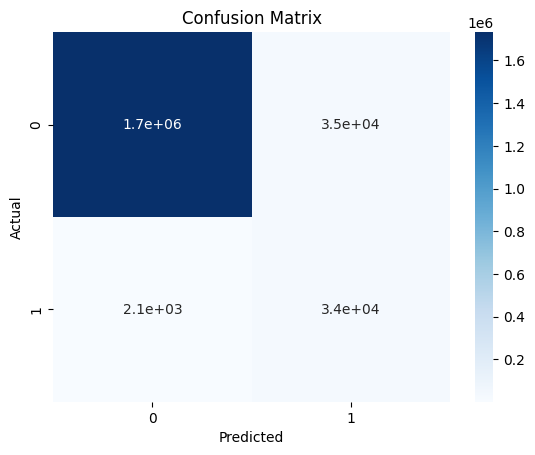

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Guardamos el modelo, en el disco (no aporta lo que esta aca)


In [ ]:
import pickle

In [ ]:
filename = 'perceptron80-20, score 0.58 - nobinary.pickle'
pickle.dump(rs, open(filename, "wb"))

In [ ]:
filename = 'ohe_encoder_tipos_ataque.pickle'
pickle.dump(ohe_encoder, open(filename, "wb"))

In [ ]:
filename = 'ohe_watcher_country.pickle'
pickle.dump(ohe_watcher_country, open(filename, "wb"))

In [ ]:
filename = 'binary_encoder_attacker_country.pickle'
pickle.dump(encoder_attacker_country, open(filename, "wb"))

In [ ]:
filename = 'mean_encoder_attacker_as_name.pickle'
pickle.dump(encoder_attacker_as_name, open(filename, "wb"))

In [ ]:
filename = 'mean_encoder_watcher_as_name.pickle'
pickle.dump(encoder_watcher_as_name, open(filename, "wb"))

In [ ]:
filename = 'mean_encoder_watcher_as_name.pickle'
pickle.dump(encoder_watcher_as_name, open(filename, "wb"))

In [ ]:
filename = 'mean_encoder_attacker_country.pickle'
pickle.dump(encoder_attacker_country, open(filename, "wb"))

In [ ]:
import pickle
filename = 'perceptron80-20score0.62.pickle'
pickle.dump(rs, open(filename, "wb"))

In [ ]:
import pickle
filename = '/content/drive/MyDrive/data tp ml/Dataframes/df_normal_undersampling/df_train.pickle'
df_train = pickle.load(open(filename, "rb"))

filename = '/content/drive/MyDrive/data tp ml/Dataframes/df_normal_undersampling/y_train.pickle'
y_train = pickle.load(open(filename, "rb"))

filename = '/content/drive/MyDrive/data tp ml/Dataframes/df_normal_undersampling/X_validation.pickle'
X_validation = pickle.load(open(filename, "rb"))

filename = '/content/drive/MyDrive/data tp ml/Dataframes/df_normal_undersampling/y_validation.pickle'
y_validation = pickle.load(open(filename, "rb"))


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score, precision_score

In [ ]:
y_pred =modelo.predict(X_validation)

In [ ]:
f1_score(y_validation, y_pred)

0.6256991382608538

In [ ]:
cm = confusion_matrix(y_validation, y_pred)
cm

array([[1728972,   38940],
       [   2150,   34344]])

In [ ]:
df_train

,attack_time,watcher_as_name,attacker_as_name,watcher_uuid_enum,http:spam,http:scan,http:exploit,otro_tipo,http:bruteforce,ssh:bruteforce,watcher_US,watcher_otro_pais,watcher_FR,watcher_DE,watcher_NL,watcher_GB,attacker_country_0,attacker_country_1,attacker_country_2,attacker_country_3
83,1.809928e-07,0.198579,0.985278,6.629045e-10,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
84,1.809928e-07,0.198579,0.985278,6.629045e-10,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1522,1.809928e-07,0.168164,0.993733,1.450103e-09,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1523,1.809928e-07,0.168164,0.993733,1.450103e-09,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2581,2.327050e-07,0.232522,0.971613,3.376669e-09,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61629536,5.429783e-07,0.236044,0.000000,1.004715e-07,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
61629537,5.429783e-07,0.236044,0.000000,1.004715e-07,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
61629612,5.429783e-07,0.258692,0.000000,4.852875e-07,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
61629618,5.429783e-07,0.258692,0.000000,4.852875e-07,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1


#Respuestas a las preguntas y Feature importance

¿Cuál es el mejor score de validación obtenido? (¿Cómo conviene obtener el dataset para validar?)

EL mejor score de validacion obtenido, tras mucha prueba y error, es 0.62. Conviene dividir por ips que te quede cierto numero de ip de un lado y cierto numero del otro. Pero que la ip que esta en train no este en validation y viceversa.

Al predecir con este modelo para test, ¿Cúal es el score obtenido?
El score obtenido con el modelo con que se consigue 0.62 para validation en el test da 0.41.



In [ ]:
import pickle
filename = '/content/drive/MyDrive/data tp ml/modelos/perceptron80-20, score 0.62 - elasticnet.pickle'
modelo = pickle.load(open(filename, "rb"))

In [ ]:
feature_importance = modelo.best_estimator_.coef_
features = modelo.best_estimator_.feature_names_in_
features

array(['attack_time', 'watcher_as_name', 'attacker_as_name',
       'watcher_uuid_enum', 'http:spam', 'http:scan', 'http:exploit',
       'otro_tipo', 'http:bruteforce', 'ssh:bruteforce', 'watcher_US',
       'watcher_otro_pais', 'watcher_FR', 'watcher_DE', 'watcher_NL',
       'watcher_GB', 'attacker_country_0', 'attacker_country_1',
       'attacker_country_2', 'attacker_country_3'], dtype=object)

In [ ]:
ancho = np.arange(len(features))
ancho

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
feature_importance = feature_importance.tolist()
importance = feature_importance[0]

features = features.tolist()

In [ ]:
df = pd.DataFrame()
df['feature'] = features
df['importance'] = importance
df

,feature,importance
0,attack_time,0.000000
1,watcher_as_name,3.540151
2,attacker_as_name,8.468624
3,watcher_uuid_enum,0.000000
4,http:spam,0.000000
5,http:scan,0.000000
6,http:exploit,0.000000
7,otro_tipo,0.000000
8,http:bruteforce,0.000000
9,ssh:bruteforce,0.000000


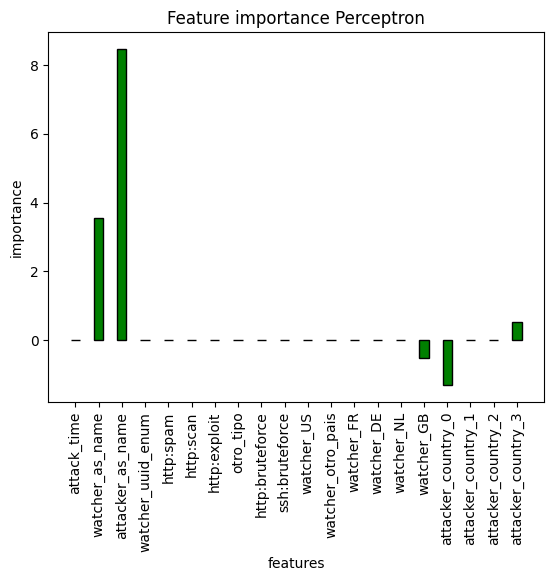

In [ ]:
plt.bar(ancho, importance, 0.4, color = 'green', edgecolor='black')

plt.xticks(ancho, labels = features, rotation = -270 )
plt.xlabel("features")
plt.ylabel("importance")
plt.title("Feature importance Perceptron")
#plt.grid(color='black')
plt.show()